In [17]:
import pickle
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Unpickling the dataframe file

In [3]:
with open('data_df.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [9]:
df.columns

Index(['index', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'Ticker'],
      dtype='object')

In [15]:
# Turning dataframe into numpy array
data = df[['open', 'high', 'low', 'close', 'adjclose', 'volume']].to_numpy()
data.shape

(255628, 6)

Running an ELBO analysis

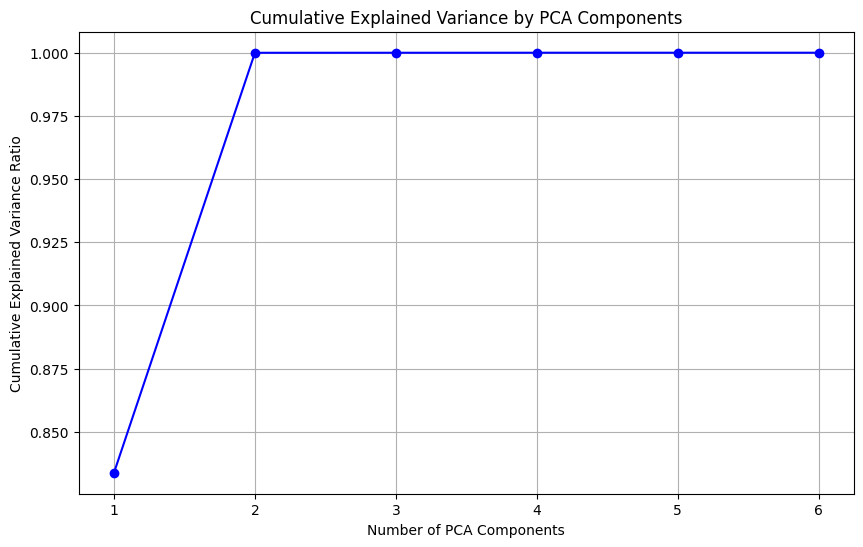

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

explained_vars_ratio_cumulative = []
# Run PCA analysis and collect cumulative explained variance ratio
for components in range(1, data.shape[1] + 1):
    pca = PCA(n_components=components)
    pca.fit(scaled_data)
    explained_variance_ratio_cumulative = sum(pca.explained_variance_ratio_)
    explained_vars_ratio_cumulative.append(explained_variance_ratio_cumulative)

# Plotting the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, data.shape[1] + 1), explained_vars_ratio_cumulative, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()